Fashin MNIST

MNIST 패션 이미지를 CNN을 이용하여 분류하세요. CNN을 이용한 분류 결과를 MLP와 비교해보세요.

In [1]:
from tensorflow import keras
from keras import models 
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.datasets import fashion_mnist

Multi-Layer Perceptron (MLP)

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

# preprocessing
X_train = X_train.reshape((60000, 28*28))
X_train = X_train/255

X_test = X_test.reshape((10000, 28*28))
X_test = X_test/255

net = models.Sequential()
net.add(layers.Dense(512, activation='relu', input_shape=(28*28,))) 
net.add(layers.Dense(512, activation='relu')) 
net.add(layers.Dropout(0.5))
net.add(layers.Dense(512, activation='relu')) 
net.add(layers.Dropout(0.5))
net.add(layers.Dense(10, activation='softmax')) 
net.compile(optimizer='nadam',loss='categorical_crossentropy',metrics=['acc'])

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
X_val = X_train[:10000]
partial_X_train = X_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [4]:

val= net.fit(partial_X_train,partial_y_train,epochs=10, batch_size=64, validation_data=(X_val, y_val))

Epoch 1/10
782/782 [==============================] - 13s 16ms/step - loss: 0.5633 - acc: 0.7986 - val_loss: 0.8253 - val_acc: 0.7344
Epoch 2/10
782/782 [==============================] - 12s 16ms/step - loss: 0.3937 - acc: 0.8577 - val_loss: 0.3713 - val_acc: 0.8619
Epoch 3/10
782/782 [==============================] - 12s 16ms/step - loss: 0.3539 - acc: 0.8717 - val_loss: 0.3535 - val_acc: 0.8724
Epoch 4/10
782/782 [==============================] - 12s 16ms/step - loss: 0.3294 - acc: 0.8807 - val_loss: 0.3344 - val_acc: 0.8819
Epoch 5/10
782/782 [==============================] - 13s 16ms/step - loss: 0.3122 - acc: 0.8869 - val_loss: 0.3400 - val_acc: 0.8790
Epoch 6/10
782/782 [==============================] - 13s 16ms/step - loss: 0.2974 - acc: 0.8914 - val_loss: 0.3582 - val_acc: 0.8759
Epoch 7/10
782/782 [==============================] - 13s 16ms/step - loss: 0.2858 - acc: 0.8959 - val_loss: 0.3131 - val_acc: 0.8833
Epoch 8/10
782/782 [==============================] - 13s 16ms

In [5]:
test_loss, test_acc = net.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3518 - acc: 0.8829


CNN

In [96]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [97]:
fasion_mnist = keras.datasets.fashion_mnist
(train_X, train_y), (test_X, test_y) = fasion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [98]:
train_X.shape

(60000, 28, 28)

In [99]:
test_X.shape

(10000, 28, 28)

In [100]:
set(train_y)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

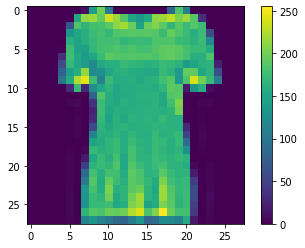

In [101]:
plt.figure()
plt.imshow(train_X[10])
plt.colorbar() 
plt.grid(False) 
plt.show()

In [102]:
train_X = train_X / 255.0 
test_X = test_X / 255.0

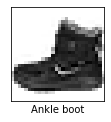

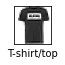

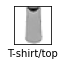

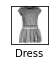

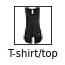

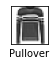

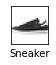

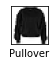

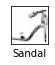

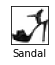

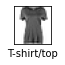

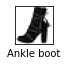

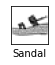

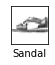

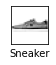

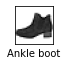

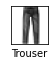

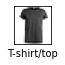

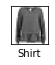

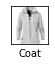

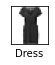

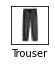

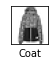

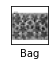

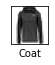

In [103]:
plt.figure(figsize = (10,10)) 
for i in range(25): 
  plt.subplot(5,5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False) 
  plt.imshow(train_X[i], cmap = plt.cm.binary) 
  plt.xlabel(class_names[train_y[i]]) 
  plt.show()

In [104]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)])

In [105]:
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [106]:
model.fit(train_X, train_y, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4958 - accuracy: 0.8269
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3740 - accuracy: 0.8653
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3367 - accuracy: 0.8770
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3120 - accuracy: 0.8860
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2928 - accuracy: 0.8924
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2801 - accuracy: 0.8960
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2659 - accuracy: 0.9013
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2582 - accuracy: 0.9038
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2478 - accuracy: 0.9070
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.236

In [107]:
test_loss, test_acc = model.evaluate(test_X, test_y) 
print('test accuracy : ', test_acc)

313/313 [==============================] - 0s 821us/step - loss: 0.3460 - accuracy: 0.8792
test accuracy :  0.8791999816894531


In [108]:
predictions = model.predict(test_X)

In [109]:
print(predictions[0]) 
print([round(p, 4) for p in predictions[0]])

[6.1521808e-11 2.4233185e-10 3.9834053e-11 1.7217347e-12 8.8354428e-12
 1.6527371e-03 1.7309116e-08 5.9403852e-03 1.2152827e-07 9.9240679e-01]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0017, 0.0, 0.0059, 0.0, 0.9924]


In [110]:
print(np.argmax(predictions[0]))

9


In [111]:
test_y[0]

9

In [112]:
def plot_image(i, predict_arr, true_label, img): 
  predict_arr, true_label, img = predict_arr[i], true_label[i], img[i] 
  plt.grid(False) 
  plt.xticks([]) 
  plt.yticks([]) 
  plt.imshow(img, cmap = plt.cm.binary) 
  predicted_label = np.argmax(predict_arr) 
  if predicted_label == true_label: color = 'blue' 
  else: color = 'red' 
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label], 
  100*np.max(predict_arr), class_names[true_label]), color=color) 
  
  def plot_value_array(i, predict_arr, true_label): 
    predict_arr, true_label = predict_arr[i], true_label[i] 
    plt.grid(False) 
    plt.xticks([]) 
    plt.yticks([]) 
    thisplot = plt.bar(range(10), predict_arr, color = "#777777" ) 
    plt.ylim([0,1]) 
    predicted_label = np.argmax(predict_arr) 
    thisplot[predicted_label].set_color('red') 
    thisplot[true_label].set_color('blue')

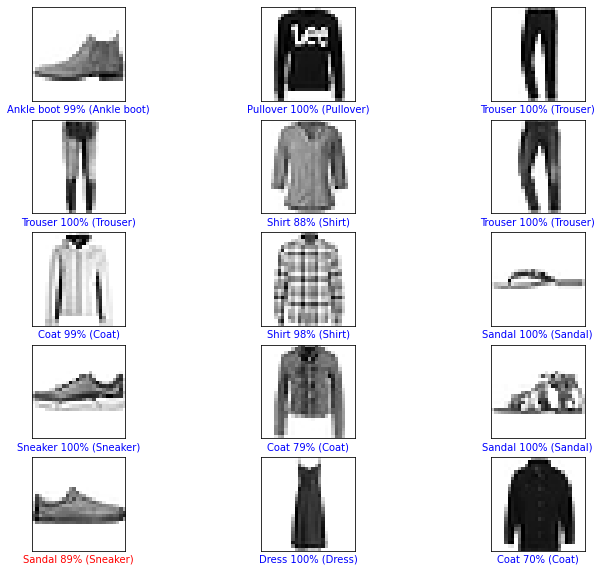

In [113]:
num_rows = 5 
num_cols = 3 
num_images = num_rows * num_cols 

plt.figure(figsize = (2*2*num_cols, 2*num_rows)) 
for i in range(num_images): 
  plt.subplot(num_rows, 2*num_cols, 2*i+1) 
  plot_image(i, predictions, test_y, test_X) 


plt.show()

In [114]:
img = (np.expand_dims(test_X[100], 0)) 
pred = model.predict(img) 
print(pred[0])

[6.2499347e-04 2.0891148e-05 4.5534066e-06 9.9898964e-01 8.1037506e-06
 9.7994890e-10 3.5057668e-04 5.6481025e-11 1.2904246e-06 4.1122359e-08]


In [115]:
model_json = model.to_json()
with open("CNN_fashion_mnist_model.json", "w") as json_file:
    json_file.write(model_json)

model.save_weights("CNN_fashion_mnist_model.h5")
print("Saved model to disk")

Saved model to disk


In [116]:
from tensorflow.compat.v2.keras.models import model_from_json

json_file = open("CNN_fashion_mnist_model.json", "r") 
loaded_model_json = json_file.read() 
json_file.close() 

loaded_model = model_from_json(loaded_model_json)

loaded_model.load_weights("CNN_fashion_mnist_model.h5")
print("Loaded model from disk")

Loaded model from disk


In [117]:
loaded_model.compile(optimizer = 'adam', 
                     loss = 'sparse_categorical_crossentropy', 
                     metrics = ['accuracy'])
test_loss, test_acc = loaded_model.evaluate(test_X, test_y) 
print("Accuracy : %.2f%%" % (test_acc*100))

313/313 [==============================] - 0s 841us/step - loss: 0.3460 - accuracy: 0.8792
Accuracy : 87.92%
